### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
import math

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


### Exploratory Data Analysis

In [3]:
df.shape

(21613, 21)

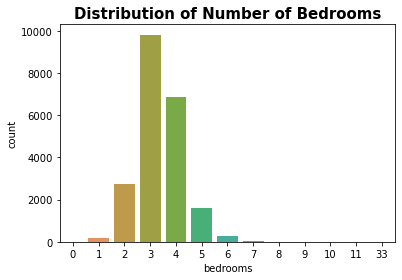

In [4]:
ax = sns.countplot(x='bedrooms', data=df)
plt.title('Distribution of Number of Bedrooms', fontsize=15, fontweight = 'bold')
plt.show()

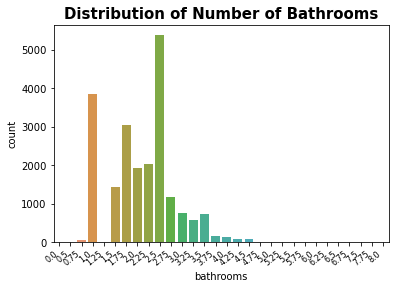

In [5]:
ax = sns.countplot(x='bathrooms', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of Number of Bathrooms', fontsize=15, fontweight = 'bold')
plt.show()

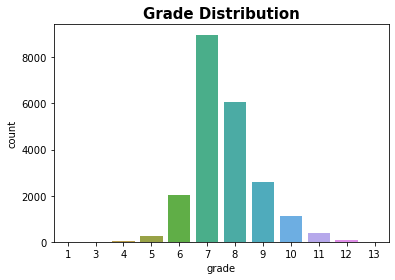

In [6]:
ax = sns.countplot(x='grade', data=df)
plt.title('Grade Distribution', fontsize=15, fontweight = 'bold')
plt.show()

### Feature Engineering : Create 'total_sqft' & 'price_per_sqft' columns 

In [7]:
df['total_sqft'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement'] + df['sqft_living15'] + df['sqft_lot15']
df['price_per_sqft'] = df['price'] / df['total_sqft']

In [8]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,total_sqft,price_per_sqft
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,2.161300e+04,21613.000000
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.401822e+05,3.402178e+04,25.930316
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.673622e+05,6.443590e+04,17.860927
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04,3.881000e+03,0.160388
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05,1.598100e+04,13.147450
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05,2.111000e+04,21.211302
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05,2.777000e+04,34.276619
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,2.082100e+06,159.161012


Noticed the following anormalities:
1. There are houses with no bedroom and bathrooms
2. There are houses with decimal values under 'bathrooms', and 'floors' column.
3. There are houses with 33 bedrooms. This is possible but i will use outlier detections to check if it is an outlier and definitely remove it so my model will work more efficiently
4. There is a house that cost 0.16 per Square feet

### Data Cleaning

In [9]:
# Convert'bathrooms', and 'floors' columns to remove decimal values

columns = ['bathrooms', 'floors']

for column in columns:
    df[column] = df[column].astype(int)

In [10]:
# Replace all '0' values in 'bedrooms' with median
df['bedrooms'] = df['bedrooms'].replace({0: df['bedrooms'].median()})

In [11]:
# Replace all '0' values in 'bathrooms' with median
df['bathrooms'] = df['bathrooms'].replace({0: math.floor(df['bathrooms'].median())})

### Feature Enginering: Remove outliers

In [12]:
# Noticed that the house with 33 bedrooms has just a bathroom with is highly unusual so i will drop it
df = df[df['bedrooms'] <= 12]
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,total_sqft,price_per_sqft
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,2.161200e+04,2.161200e+04,21612.000000
mean,4.580402e+09,3.371275,1.757727,2079.921016,1.510739e+04,1.446234,0.007542,0.234314,3.409356,7.656904,...,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984,5.401775e+05,3.402264e+04,25.929577
std,2.876594e+09,0.904257,0.726663,918.456818,4.142142e+04,0.551898,0.086519,0.766334,0.650668,1.175477,...,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179,3.673701e+05,6.443726e+04,17.861009
min,1.000102e+06,1.000000,1.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04,3.881000e+03,0.160388
25%,2.123049e+09,3.000000,1.000000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000,3.218375e+05,1.598250e+04,13.147255
50%,3.904930e+09,3.000000,2.000000,1910.000000,7.619000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05,2.111000e+04,21.210928
75%,7.308900e+09,4.000000,2.000000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,6.450000e+05,2.777000e+04,34.274107
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,2.082100e+06,159.161012


In [13]:
# Drop irrelevant columns
df = df.drop(['id', 'date', 'lat', 'long', 'total_sqft'], axis='columns')
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,price_per_sqft
0,3.0,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900.0,14.793333
1,3.0,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000.0,24.780065
2,2.0,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000.0,8.063794
3,4.0,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000.0,39.528796
4,3.0,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000.0,24.586608


### Find the best performing model

In [14]:
X = df.drop(['price', 'price_per_sqft'], axis='columns')
y = df.price

In [15]:
model_params = {
    'linear_regression':{
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'catboost':{
        'model': CatBoostRegressor(),
        'params': {
    
        } 
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}

In [16]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

Learning rate set to 0.064231
0:	learn: 349781.6629672	total: 172ms	remaining: 2m 51s
1:	learn: 338937.2438354	total: 178ms	remaining: 1m 29s
2:	learn: 328460.0887616	total: 183ms	remaining: 1m
3:	learn: 318830.1888954	total: 187ms	remaining: 46.5s
4:	learn: 309406.1900445	total: 191ms	remaining: 38s
5:	learn: 301166.5120421	total: 195ms	remaining: 32.3s
6:	learn: 292769.8355514	total: 199ms	remaining: 28.2s
7:	learn: 285216.9831805	total: 203ms	remaining: 25.1s
8:	learn: 278552.5197944	total: 207ms	remaining: 22.8s
9:	learn: 272039.0431211	total: 211ms	remaining: 20.9s
10:	learn: 266090.2819275	total: 215ms	remaining: 19.4s
11:	learn: 260546.9423250	total: 219ms	remaining: 18s
12:	learn: 255727.7704503	total: 223ms	remaining: 17s
13:	learn: 250883.4786357	total: 227ms	remaining: 16s
14:	learn: 246146.5107083	total: 231ms	remaining: 15.2s
15:	learn: 242052.0000984	total: 235ms	remaining: 14.4s
16:	learn: 238256.5098048	total: 239ms	remaining: 13.8s
17:	learn: 234707.3012615	total: 242m

179:	learn: 132807.2076258	total: 886ms	remaining: 4.04s
180:	learn: 132679.0455229	total: 891ms	remaining: 4.03s
181:	learn: 132549.7509774	total: 895ms	remaining: 4.02s
182:	learn: 132255.9982329	total: 900ms	remaining: 4.02s
183:	learn: 132087.8137579	total: 903ms	remaining: 4s
184:	learn: 131630.7496871	total: 907ms	remaining: 4s
185:	learn: 131283.9359299	total: 911ms	remaining: 3.99s
186:	learn: 131141.0728270	total: 916ms	remaining: 3.98s
187:	learn: 130735.2426702	total: 921ms	remaining: 3.98s
188:	learn: 130622.5671425	total: 926ms	remaining: 3.97s
189:	learn: 130339.2802303	total: 931ms	remaining: 3.97s
190:	learn: 130146.8438941	total: 937ms	remaining: 3.97s
191:	learn: 129928.2377058	total: 941ms	remaining: 3.96s
192:	learn: 129661.1609460	total: 947ms	remaining: 3.96s
193:	learn: 129549.5131968	total: 952ms	remaining: 3.95s
194:	learn: 129228.7811190	total: 957ms	remaining: 3.95s
195:	learn: 129036.5829035	total: 962ms	remaining: 3.94s
196:	learn: 128910.9701388	total: 966

339:	learn: 110180.3162468	total: 1.59s	remaining: 3.09s
340:	learn: 110099.5660042	total: 1.6s	remaining: 3.08s
341:	learn: 110032.8151733	total: 1.6s	remaining: 3.08s
342:	learn: 109941.7514334	total: 1.6s	remaining: 3.07s
343:	learn: 109868.9362817	total: 1.61s	remaining: 3.07s
344:	learn: 109784.4834709	total: 1.61s	remaining: 3.06s
345:	learn: 109616.2343792	total: 1.62s	remaining: 3.06s
346:	learn: 109592.2933045	total: 1.62s	remaining: 3.05s
347:	learn: 109533.6106065	total: 1.63s	remaining: 3.05s
348:	learn: 109439.0219768	total: 1.63s	remaining: 3.04s
349:	learn: 109344.3147644	total: 1.64s	remaining: 3.04s
350:	learn: 109253.6003430	total: 1.64s	remaining: 3.03s
351:	learn: 109171.1723603	total: 1.64s	remaining: 3.03s
352:	learn: 109117.6617326	total: 1.65s	remaining: 3.02s
353:	learn: 109065.4586387	total: 1.65s	remaining: 3.02s
354:	learn: 108980.5984638	total: 1.66s	remaining: 3.01s
355:	learn: 108898.4131260	total: 1.66s	remaining: 3s
356:	learn: 108842.1712822	total: 1.6

500:	learn: 98755.5431251	total: 2.3s	remaining: 2.29s
501:	learn: 98707.8376369	total: 2.31s	remaining: 2.29s
502:	learn: 98648.2708697	total: 2.31s	remaining: 2.28s
503:	learn: 98569.7924487	total: 2.31s	remaining: 2.28s
504:	learn: 98504.9332034	total: 2.32s	remaining: 2.27s
505:	learn: 98452.0697225	total: 2.32s	remaining: 2.27s
506:	learn: 98371.9106104	total: 2.33s	remaining: 2.26s
507:	learn: 98321.3231621	total: 2.33s	remaining: 2.26s
508:	learn: 98261.0017308	total: 2.34s	remaining: 2.25s
509:	learn: 98215.9864828	total: 2.34s	remaining: 2.25s
510:	learn: 98185.8909410	total: 2.34s	remaining: 2.24s
511:	learn: 98128.7040058	total: 2.35s	remaining: 2.24s
512:	learn: 98095.6734578	total: 2.35s	remaining: 2.23s
513:	learn: 98039.7624868	total: 2.36s	remaining: 2.23s
514:	learn: 97986.2784716	total: 2.36s	remaining: 2.22s
515:	learn: 97913.8594321	total: 2.37s	remaining: 2.22s
516:	learn: 97850.7782886	total: 2.37s	remaining: 2.21s
517:	learn: 97765.4251095	total: 2.38s	remaining:

658:	learn: 91563.1314951	total: 3.21s	remaining: 1.66s
659:	learn: 91519.7805715	total: 3.21s	remaining: 1.66s
660:	learn: 91494.0655827	total: 3.22s	remaining: 1.65s
661:	learn: 91463.7881292	total: 3.22s	remaining: 1.65s
662:	learn: 91423.1446660	total: 3.23s	remaining: 1.64s
663:	learn: 91381.8796754	total: 3.24s	remaining: 1.64s
664:	learn: 91353.8017608	total: 3.25s	remaining: 1.64s
665:	learn: 91323.0301127	total: 3.25s	remaining: 1.63s
666:	learn: 91269.0454030	total: 3.26s	remaining: 1.63s
667:	learn: 91235.0593150	total: 3.27s	remaining: 1.62s
668:	learn: 91201.3702967	total: 3.27s	remaining: 1.62s
669:	learn: 91163.1600682	total: 3.28s	remaining: 1.62s
670:	learn: 91106.9744603	total: 3.29s	remaining: 1.61s
671:	learn: 91089.7122037	total: 3.3s	remaining: 1.61s
672:	learn: 91063.2512575	total: 3.3s	remaining: 1.6s
673:	learn: 91031.8594924	total: 3.31s	remaining: 1.6s
674:	learn: 90990.8102360	total: 3.32s	remaining: 1.6s
675:	learn: 90955.8983403	total: 3.32s	remaining: 1.5

820:	learn: 86281.1121484	total: 4.1s	remaining: 894ms
821:	learn: 86259.8020865	total: 4.11s	remaining: 889ms
822:	learn: 86227.4093718	total: 4.11s	remaining: 884ms
823:	learn: 86208.0717408	total: 4.12s	remaining: 879ms
824:	learn: 86178.2249150	total: 4.12s	remaining: 874ms
825:	learn: 86149.7499328	total: 4.12s	remaining: 869ms
826:	learn: 86102.8932698	total: 4.13s	remaining: 864ms
827:	learn: 86062.1169833	total: 4.13s	remaining: 859ms
828:	learn: 86043.1790475	total: 4.14s	remaining: 853ms
829:	learn: 86019.8498676	total: 4.14s	remaining: 848ms
830:	learn: 85999.4240881	total: 4.15s	remaining: 843ms
831:	learn: 85976.9027222	total: 4.15s	remaining: 838ms
832:	learn: 85946.0539534	total: 4.16s	remaining: 833ms
833:	learn: 85908.9987505	total: 4.16s	remaining: 828ms
834:	learn: 85894.1603702	total: 4.17s	remaining: 823ms
835:	learn: 85867.0538613	total: 4.17s	remaining: 818ms
836:	learn: 85841.5049821	total: 4.17s	remaining: 813ms
837:	learn: 85821.5205619	total: 4.18s	remaining:

979:	learn: 82378.3780453	total: 4.81s	remaining: 98.3ms
980:	learn: 82359.4043343	total: 4.82s	remaining: 93.3ms
981:	learn: 82324.5747190	total: 4.82s	remaining: 88.4ms
982:	learn: 82298.6638077	total: 4.83s	remaining: 83.5ms
983:	learn: 82279.0742901	total: 4.83s	remaining: 78.6ms
984:	learn: 82256.5291634	total: 4.84s	remaining: 73.7ms
985:	learn: 82243.6620684	total: 4.84s	remaining: 68.7ms
986:	learn: 82218.7851273	total: 4.85s	remaining: 63.8ms
987:	learn: 82198.0995337	total: 4.85s	remaining: 58.9ms
988:	learn: 82181.2611010	total: 4.85s	remaining: 54ms
989:	learn: 82165.1035889	total: 4.86s	remaining: 49.1ms
990:	learn: 82141.6401062	total: 4.86s	remaining: 44.2ms
991:	learn: 82112.4125756	total: 4.87s	remaining: 39.3ms
992:	learn: 82091.0817573	total: 4.87s	remaining: 34.3ms
993:	learn: 82058.5671066	total: 4.88s	remaining: 29.4ms
994:	learn: 82041.2408978	total: 4.88s	remaining: 24.5ms
995:	learn: 82008.0983004	total: 4.88s	remaining: 19.6ms
996:	learn: 81988.0357763	total: 

154:	learn: 138093.5404659	total: 727ms	remaining: 3.96s
155:	learn: 137891.8473140	total: 737ms	remaining: 3.99s
156:	learn: 137732.0218162	total: 745ms	remaining: 4s
157:	learn: 137513.7687163	total: 753ms	remaining: 4.01s
158:	learn: 137384.0289412	total: 763ms	remaining: 4.04s
159:	learn: 137203.0958708	total: 770ms	remaining: 4.04s
160:	learn: 137060.8163844	total: 780ms	remaining: 4.07s
161:	learn: 136921.6885583	total: 786ms	remaining: 4.07s
162:	learn: 136645.4872603	total: 796ms	remaining: 4.09s
163:	learn: 136057.2791525	total: 803ms	remaining: 4.09s
164:	learn: 135906.6697127	total: 812ms	remaining: 4.11s
165:	learn: 135735.8347035	total: 818ms	remaining: 4.11s
166:	learn: 135581.2129227	total: 828ms	remaining: 4.13s
167:	learn: 135393.2014679	total: 835ms	remaining: 4.13s
168:	learn: 135053.2914273	total: 847ms	remaining: 4.16s
169:	learn: 134771.8177781	total: 853ms	remaining: 4.17s
170:	learn: 134506.1531758	total: 862ms	remaining: 4.18s
171:	learn: 133984.0102065	total: 

328:	learn: 111754.1934418	total: 1.81s	remaining: 3.7s
329:	learn: 111712.4154223	total: 1.82s	remaining: 3.69s
330:	learn: 111676.9469708	total: 1.82s	remaining: 3.68s
331:	learn: 111538.3299898	total: 1.83s	remaining: 3.68s
332:	learn: 111463.8427948	total: 1.83s	remaining: 3.67s
333:	learn: 111390.6405968	total: 1.84s	remaining: 3.66s
334:	learn: 111313.1780141	total: 1.84s	remaining: 3.65s
335:	learn: 111219.9493123	total: 1.84s	remaining: 3.65s
336:	learn: 111120.3963816	total: 1.85s	remaining: 3.64s
337:	learn: 110983.4526527	total: 1.85s	remaining: 3.63s
338:	learn: 110905.6274758	total: 1.86s	remaining: 3.62s
339:	learn: 110810.1043535	total: 1.86s	remaining: 3.62s
340:	learn: 110718.4345202	total: 1.87s	remaining: 3.61s
341:	learn: 110671.2739171	total: 1.87s	remaining: 3.6s
342:	learn: 110606.6115657	total: 1.88s	remaining: 3.59s
343:	learn: 110437.1963481	total: 1.88s	remaining: 3.59s
344:	learn: 110368.3348575	total: 1.89s	remaining: 3.58s
345:	learn: 110320.6272339	total:

479:	learn: 101089.8865905	total: 2.52s	remaining: 2.73s
480:	learn: 101038.2809135	total: 2.53s	remaining: 2.73s
481:	learn: 100981.2885494	total: 2.53s	remaining: 2.72s
482:	learn: 100877.8477588	total: 2.54s	remaining: 2.72s
483:	learn: 100809.6285451	total: 2.54s	remaining: 2.71s
484:	learn: 100759.7145675	total: 2.55s	remaining: 2.71s
485:	learn: 100702.4746551	total: 2.55s	remaining: 2.7s
486:	learn: 100656.1159962	total: 2.56s	remaining: 2.69s
487:	learn: 100622.0282841	total: 2.56s	remaining: 2.69s
488:	learn: 100553.6231709	total: 2.57s	remaining: 2.68s
489:	learn: 100515.2759375	total: 2.57s	remaining: 2.68s
490:	learn: 100474.7352972	total: 2.58s	remaining: 2.67s
491:	learn: 100420.4656259	total: 2.58s	remaining: 2.67s
492:	learn: 100361.8932092	total: 2.59s	remaining: 2.66s
493:	learn: 100306.9049150	total: 2.59s	remaining: 2.65s
494:	learn: 100270.4765425	total: 2.6s	remaining: 2.65s
495:	learn: 100226.4249781	total: 2.6s	remaining: 2.64s
496:	learn: 100216.8228733	total: 

637:	learn: 93651.5080917	total: 3.24s	remaining: 1.84s
638:	learn: 93628.7137708	total: 3.24s	remaining: 1.83s
639:	learn: 93587.4939785	total: 3.25s	remaining: 1.83s
640:	learn: 93551.9137757	total: 3.25s	remaining: 1.82s
641:	learn: 93498.2417475	total: 3.26s	remaining: 1.81s
642:	learn: 93468.3492734	total: 3.26s	remaining: 1.81s
643:	learn: 93440.0174681	total: 3.27s	remaining: 1.8s
644:	learn: 93391.7153724	total: 3.27s	remaining: 1.8s
645:	learn: 93322.7677501	total: 3.27s	remaining: 1.79s
646:	learn: 93289.5471663	total: 3.28s	remaining: 1.79s
647:	learn: 93256.6465884	total: 3.28s	remaining: 1.78s
648:	learn: 93225.7783799	total: 3.29s	remaining: 1.78s
649:	learn: 93181.6186318	total: 3.29s	remaining: 1.77s
650:	learn: 93145.7895315	total: 3.3s	remaining: 1.77s
651:	learn: 93122.1400744	total: 3.3s	remaining: 1.76s
652:	learn: 93087.6007449	total: 3.31s	remaining: 1.76s
653:	learn: 93067.9021590	total: 3.31s	remaining: 1.75s
654:	learn: 93035.7271409	total: 3.31s	remaining: 1.

793:	learn: 88190.6583645	total: 3.94s	remaining: 1.02s
794:	learn: 88158.5584378	total: 3.95s	remaining: 1.02s
795:	learn: 88134.7791128	total: 3.96s	remaining: 1.01s
796:	learn: 88108.5568280	total: 3.96s	remaining: 1.01s
797:	learn: 88091.6821509	total: 3.96s	remaining: 1s
798:	learn: 88050.3590126	total: 3.97s	remaining: 999ms
799:	learn: 88022.8048049	total: 3.97s	remaining: 994ms
800:	learn: 87976.8423588	total: 3.98s	remaining: 989ms
801:	learn: 87960.2716327	total: 3.98s	remaining: 983ms
802:	learn: 87932.3360385	total: 3.99s	remaining: 978ms
803:	learn: 87896.7272685	total: 3.99s	remaining: 973ms
804:	learn: 87873.3686847	total: 4s	remaining: 968ms
805:	learn: 87818.1424574	total: 4s	remaining: 963ms
806:	learn: 87788.0142843	total: 4s	remaining: 958ms
807:	learn: 87772.2531205	total: 4.01s	remaining: 953ms
808:	learn: 87734.8844195	total: 4.01s	remaining: 948ms
809:	learn: 87693.7645458	total: 4.02s	remaining: 943ms
810:	learn: 87626.6222216	total: 4.03s	remaining: 938ms
811:

946:	learn: 83757.5661015	total: 4.66s	remaining: 261ms
947:	learn: 83733.2196166	total: 4.66s	remaining: 256ms
948:	learn: 83702.7142378	total: 4.67s	remaining: 251ms
949:	learn: 83681.9358375	total: 4.67s	remaining: 246ms
950:	learn: 83659.8181749	total: 4.67s	remaining: 241ms
951:	learn: 83637.6757785	total: 4.68s	remaining: 236ms
952:	learn: 83614.5488498	total: 4.68s	remaining: 231ms
953:	learn: 83605.4142422	total: 4.69s	remaining: 226ms
954:	learn: 83571.4985511	total: 4.69s	remaining: 221ms
955:	learn: 83559.1172017	total: 4.7s	remaining: 216ms
956:	learn: 83549.9614834	total: 4.7s	remaining: 211ms
957:	learn: 83502.6367925	total: 4.7s	remaining: 206ms
958:	learn: 83476.4733934	total: 4.71s	remaining: 201ms
959:	learn: 83458.6425561	total: 4.71s	remaining: 196ms
960:	learn: 83430.2478122	total: 4.72s	remaining: 191ms
961:	learn: 83385.4835672	total: 4.72s	remaining: 187ms
962:	learn: 83362.9079621	total: 4.73s	remaining: 182ms
963:	learn: 83348.3130371	total: 4.73s	remaining: 1

128:	learn: 146707.3508906	total: 575ms	remaining: 3.88s
129:	learn: 146407.2794713	total: 580ms	remaining: 3.88s
130:	learn: 146212.1280074	total: 584ms	remaining: 3.87s
131:	learn: 146057.7852431	total: 587ms	remaining: 3.86s
132:	learn: 145893.4307934	total: 592ms	remaining: 3.86s
133:	learn: 145542.0200513	total: 596ms	remaining: 3.85s
134:	learn: 145383.6896901	total: 600ms	remaining: 3.85s
135:	learn: 145227.2057614	total: 605ms	remaining: 3.84s
136:	learn: 144935.8701900	total: 610ms	remaining: 3.84s
137:	learn: 144437.4592249	total: 614ms	remaining: 3.84s
138:	learn: 144032.9533866	total: 619ms	remaining: 3.84s
139:	learn: 143882.0972155	total: 624ms	remaining: 3.83s
140:	learn: 143419.5792369	total: 628ms	remaining: 3.83s
141:	learn: 142912.7586252	total: 633ms	remaining: 3.82s
142:	learn: 142621.2528023	total: 637ms	remaining: 3.82s
143:	learn: 142390.9668620	total: 641ms	remaining: 3.81s
144:	learn: 142186.0066152	total: 645ms	remaining: 3.81s
145:	learn: 141919.7757779	tota

290:	learn: 117003.7822201	total: 1.48s	remaining: 3.61s
291:	learn: 116877.5118384	total: 1.49s	remaining: 3.6s
292:	learn: 116711.4583759	total: 1.49s	remaining: 3.6s
293:	learn: 116616.3878441	total: 1.51s	remaining: 3.63s
294:	learn: 116499.2390601	total: 1.51s	remaining: 3.62s
295:	learn: 116430.0106874	total: 1.52s	remaining: 3.61s
296:	learn: 116307.8387251	total: 1.52s	remaining: 3.6s
297:	learn: 116172.2160417	total: 1.53s	remaining: 3.6s
298:	learn: 116077.4890363	total: 1.53s	remaining: 3.59s
299:	learn: 115980.5185513	total: 1.54s	remaining: 3.59s
300:	learn: 115875.5104210	total: 1.54s	remaining: 3.58s
301:	learn: 115777.4451842	total: 1.55s	remaining: 3.58s
302:	learn: 115688.0316454	total: 1.55s	remaining: 3.57s
303:	learn: 115594.0896015	total: 1.56s	remaining: 3.56s
304:	learn: 115502.9078484	total: 1.56s	remaining: 3.56s
305:	learn: 115420.3061901	total: 1.56s	remaining: 3.55s
306:	learn: 115336.4423956	total: 1.57s	remaining: 3.54s
307:	learn: 115251.5217403	total: 1

435:	learn: 104599.1413040	total: 2.19s	remaining: 2.83s
436:	learn: 104541.3461390	total: 2.19s	remaining: 2.83s
437:	learn: 104491.7854425	total: 2.2s	remaining: 2.82s
438:	learn: 104421.1703114	total: 2.2s	remaining: 2.81s
439:	learn: 104357.1139460	total: 2.21s	remaining: 2.81s
440:	learn: 104286.7468683	total: 2.21s	remaining: 2.8s
441:	learn: 104212.2075251	total: 2.22s	remaining: 2.8s
442:	learn: 104121.9132402	total: 2.22s	remaining: 2.79s
443:	learn: 104081.6695222	total: 2.23s	remaining: 2.79s
444:	learn: 104047.4748751	total: 2.23s	remaining: 2.78s
445:	learn: 103965.5041565	total: 2.23s	remaining: 2.78s
446:	learn: 103889.3391467	total: 2.24s	remaining: 2.77s
447:	learn: 103857.5498609	total: 2.24s	remaining: 2.77s
448:	learn: 103813.7246821	total: 2.25s	remaining: 2.76s
449:	learn: 103749.5962550	total: 2.25s	remaining: 2.75s
450:	learn: 103698.3425825	total: 2.26s	remaining: 2.75s
451:	learn: 103619.2783018	total: 2.26s	remaining: 2.74s
452:	learn: 103573.5774284	total: 2

599:	learn: 95887.7824659	total: 3.08s	remaining: 2.05s
600:	learn: 95856.1957011	total: 3.08s	remaining: 2.05s
601:	learn: 95818.0623077	total: 3.09s	remaining: 2.04s
602:	learn: 95773.6725467	total: 3.1s	remaining: 2.04s
603:	learn: 95733.2947136	total: 3.1s	remaining: 2.03s
604:	learn: 95676.4593317	total: 3.11s	remaining: 2.03s
605:	learn: 95630.2697054	total: 3.11s	remaining: 2.02s
606:	learn: 95558.7257777	total: 3.12s	remaining: 2.02s
607:	learn: 95528.9458007	total: 3.12s	remaining: 2.01s
608:	learn: 95489.2431182	total: 3.13s	remaining: 2.01s
609:	learn: 95434.2664101	total: 3.13s	remaining: 2s
610:	learn: 95407.2000281	total: 3.14s	remaining: 2s
611:	learn: 95351.5744448	total: 3.14s	remaining: 1.99s
612:	learn: 95317.7107405	total: 3.15s	remaining: 1.99s
613:	learn: 95277.0154970	total: 3.15s	remaining: 1.98s
614:	learn: 95212.8026255	total: 3.16s	remaining: 1.98s
615:	learn: 95175.8936755	total: 3.16s	remaining: 1.97s
616:	learn: 95141.9501516	total: 3.17s	remaining: 1.97s


777:	learn: 89315.3204100	total: 3.97s	remaining: 1.13s
778:	learn: 89296.3394046	total: 3.97s	remaining: 1.13s
779:	learn: 89255.3767539	total: 3.98s	remaining: 1.12s
780:	learn: 89216.6912167	total: 3.98s	remaining: 1.12s
781:	learn: 89177.5559814	total: 3.99s	remaining: 1.11s
782:	learn: 89151.7275941	total: 4s	remaining: 1.11s
783:	learn: 89121.8751895	total: 4s	remaining: 1.1s
784:	learn: 89105.3145362	total: 4s	remaining: 1.1s
785:	learn: 89074.7359144	total: 4.01s	remaining: 1.09s
786:	learn: 89055.0235152	total: 4.01s	remaining: 1.09s
787:	learn: 89034.5222202	total: 4.02s	remaining: 1.08s
788:	learn: 89005.8029925	total: 4.03s	remaining: 1.08s
789:	learn: 88997.7339829	total: 4.03s	remaining: 1.07s
790:	learn: 88959.0744907	total: 4.04s	remaining: 1.07s
791:	learn: 88904.2994255	total: 4.04s	remaining: 1.06s
792:	learn: 88861.8592066	total: 4.05s	remaining: 1.06s
793:	learn: 88811.5533018	total: 4.05s	remaining: 1.05s
794:	learn: 88767.4605483	total: 4.06s	remaining: 1.05s
795

954:	learn: 84285.7293502	total: 4.85s	remaining: 229ms
955:	learn: 84258.9945374	total: 4.86s	remaining: 223ms
956:	learn: 84241.1607979	total: 4.86s	remaining: 218ms
957:	learn: 84213.0877672	total: 4.87s	remaining: 213ms
958:	learn: 84194.4973086	total: 4.87s	remaining: 208ms
959:	learn: 84176.5189429	total: 4.87s	remaining: 203ms
960:	learn: 84155.5376602	total: 4.88s	remaining: 198ms
961:	learn: 84138.9685049	total: 4.88s	remaining: 193ms
962:	learn: 84094.7183896	total: 4.89s	remaining: 188ms
963:	learn: 84068.8239777	total: 4.9s	remaining: 183ms
964:	learn: 84040.7296594	total: 4.9s	remaining: 178ms
965:	learn: 84015.4960508	total: 4.91s	remaining: 173ms
966:	learn: 83988.5619168	total: 4.91s	remaining: 168ms
967:	learn: 83967.6175326	total: 4.92s	remaining: 162ms
968:	learn: 83917.8323885	total: 4.92s	remaining: 157ms
969:	learn: 83898.5747958	total: 4.93s	remaining: 152ms
970:	learn: 83875.9921779	total: 4.93s	remaining: 147ms
971:	learn: 83851.4060450	total: 4.94s	remaining: 

119:	learn: 146408.0633999	total: 585ms	remaining: 4.29s
120:	learn: 146234.4986959	total: 589ms	remaining: 4.28s
121:	learn: 146089.3624524	total: 593ms	remaining: 4.27s
122:	learn: 145926.8634540	total: 598ms	remaining: 4.26s
123:	learn: 145761.3492068	total: 602ms	remaining: 4.25s
124:	learn: 145470.1382662	total: 607ms	remaining: 4.25s
125:	learn: 145129.2488485	total: 613ms	remaining: 4.25s
126:	learn: 144722.0331113	total: 617ms	remaining: 4.24s
127:	learn: 144466.6084795	total: 622ms	remaining: 4.24s
128:	learn: 144193.4577415	total: 626ms	remaining: 4.23s
129:	learn: 144046.9288543	total: 631ms	remaining: 4.22s
130:	learn: 143776.1319960	total: 636ms	remaining: 4.22s
131:	learn: 143535.0288788	total: 640ms	remaining: 4.21s
132:	learn: 143243.7675029	total: 645ms	remaining: 4.21s
133:	learn: 143112.2034369	total: 649ms	remaining: 4.2s
134:	learn: 142839.3291718	total: 654ms	remaining: 4.19s
135:	learn: 142477.5937243	total: 659ms	remaining: 4.18s
136:	learn: 141986.8809635	total

265:	learn: 117860.2540884	total: 1.3s	remaining: 3.58s
266:	learn: 117753.5888219	total: 1.3s	remaining: 3.57s
267:	learn: 117632.6774593	total: 1.31s	remaining: 3.57s
268:	learn: 117536.9749245	total: 1.31s	remaining: 3.56s
269:	learn: 117468.7087800	total: 1.31s	remaining: 3.55s
270:	learn: 117236.4591417	total: 1.32s	remaining: 3.55s
271:	learn: 117136.0741259	total: 1.32s	remaining: 3.54s
272:	learn: 116989.8883888	total: 1.33s	remaining: 3.54s
273:	learn: 116849.1309750	total: 1.33s	remaining: 3.53s
274:	learn: 116762.5535000	total: 1.34s	remaining: 3.53s
275:	learn: 116588.5325861	total: 1.34s	remaining: 3.52s
276:	learn: 116519.9878885	total: 1.35s	remaining: 3.52s
277:	learn: 116370.3485391	total: 1.35s	remaining: 3.51s
278:	learn: 116153.3705086	total: 1.36s	remaining: 3.51s
279:	learn: 116018.8944332	total: 1.36s	remaining: 3.5s
280:	learn: 115962.1575351	total: 1.37s	remaining: 3.5s
281:	learn: 115867.3119260	total: 1.37s	remaining: 3.49s
282:	learn: 115725.6849788	total: 1

444:	learn: 102150.1193234	total: 2.18s	remaining: 2.72s
445:	learn: 102108.3062106	total: 2.18s	remaining: 2.71s
446:	learn: 102021.6356434	total: 2.19s	remaining: 2.71s
447:	learn: 101962.7181590	total: 2.19s	remaining: 2.7s
448:	learn: 101847.4640475	total: 2.2s	remaining: 2.7s
449:	learn: 101795.1544922	total: 2.2s	remaining: 2.69s
450:	learn: 101739.2911793	total: 2.21s	remaining: 2.69s
451:	learn: 101674.7179437	total: 2.21s	remaining: 2.68s
452:	learn: 101629.1705625	total: 2.22s	remaining: 2.68s
453:	learn: 101597.0911782	total: 2.22s	remaining: 2.67s
454:	learn: 101563.2263074	total: 2.23s	remaining: 2.67s
455:	learn: 101535.2964309	total: 2.23s	remaining: 2.67s
456:	learn: 101465.6542280	total: 2.24s	remaining: 2.66s
457:	learn: 101405.0819125	total: 2.24s	remaining: 2.65s
458:	learn: 101340.5205546	total: 2.25s	remaining: 2.65s
459:	learn: 101297.2034481	total: 2.25s	remaining: 2.65s
460:	learn: 101249.4733967	total: 2.26s	remaining: 2.64s
461:	learn: 101202.2663966	total: 2

591:	learn: 95038.2278272	total: 2.89s	remaining: 1.99s
592:	learn: 95003.8927221	total: 2.9s	remaining: 1.99s
593:	learn: 94959.1348152	total: 2.9s	remaining: 1.98s
594:	learn: 94933.8685123	total: 2.9s	remaining: 1.98s
595:	learn: 94863.9614165	total: 2.91s	remaining: 1.97s
596:	learn: 94748.6871396	total: 2.92s	remaining: 1.97s
597:	learn: 94704.0076127	total: 2.92s	remaining: 1.96s
598:	learn: 94666.5549770	total: 2.92s	remaining: 1.96s
599:	learn: 94625.9987279	total: 2.93s	remaining: 1.95s
600:	learn: 94597.4604483	total: 2.93s	remaining: 1.95s
601:	learn: 94494.8433775	total: 2.94s	remaining: 1.94s
602:	learn: 94425.0902481	total: 2.94s	remaining: 1.94s
603:	learn: 94401.5529801	total: 2.95s	remaining: 1.93s
604:	learn: 94368.9528549	total: 2.95s	remaining: 1.93s
605:	learn: 94313.5046800	total: 2.96s	remaining: 1.92s
606:	learn: 94263.4931359	total: 2.96s	remaining: 1.92s
607:	learn: 94200.3210208	total: 2.97s	remaining: 1.91s
608:	learn: 94163.5276523	total: 2.97s	remaining: 1

770:	learn: 88418.5954222	total: 3.77s	remaining: 1.12s
771:	learn: 88385.0852210	total: 3.78s	remaining: 1.11s
772:	learn: 88342.0180606	total: 3.78s	remaining: 1.11s
773:	learn: 88325.5885568	total: 3.79s	remaining: 1.1s
774:	learn: 88304.5045569	total: 3.79s	remaining: 1.1s
775:	learn: 88270.2457399	total: 3.8s	remaining: 1.09s
776:	learn: 88240.8235308	total: 3.8s	remaining: 1.09s
777:	learn: 88206.6741601	total: 3.81s	remaining: 1.08s
778:	learn: 88165.7328185	total: 3.81s	remaining: 1.08s
779:	learn: 88142.3789260	total: 3.82s	remaining: 1.08s
780:	learn: 88102.1482407	total: 3.82s	remaining: 1.07s
781:	learn: 88075.0009750	total: 3.83s	remaining: 1.07s
782:	learn: 88020.3171238	total: 3.83s	remaining: 1.06s
783:	learn: 87998.0300257	total: 3.84s	remaining: 1.06s
784:	learn: 87957.7869131	total: 3.84s	remaining: 1.05s
785:	learn: 87930.3314462	total: 3.85s	remaining: 1.05s
786:	learn: 87908.1120077	total: 3.85s	remaining: 1.04s
787:	learn: 87891.6107012	total: 3.86s	remaining: 1.

950:	learn: 83351.4678627	total: 4.66s	remaining: 240ms
951:	learn: 83300.3516762	total: 4.67s	remaining: 235ms
952:	learn: 83278.5153923	total: 4.67s	remaining: 230ms
953:	learn: 83249.6229533	total: 4.68s	remaining: 225ms
954:	learn: 83232.1411222	total: 4.68s	remaining: 221ms
955:	learn: 83201.2076756	total: 4.68s	remaining: 216ms
956:	learn: 83172.3163819	total: 4.69s	remaining: 211ms
957:	learn: 83109.0955578	total: 4.7s	remaining: 206ms
958:	learn: 83096.1460638	total: 4.7s	remaining: 201ms
959:	learn: 83080.4587730	total: 4.71s	remaining: 196ms
960:	learn: 83057.1590423	total: 4.71s	remaining: 191ms
961:	learn: 83022.5203881	total: 4.72s	remaining: 186ms
962:	learn: 83011.0151297	total: 4.72s	remaining: 181ms
963:	learn: 82969.7294388	total: 4.73s	remaining: 176ms
964:	learn: 82913.5113518	total: 4.73s	remaining: 172ms
965:	learn: 82889.5188778	total: 4.74s	remaining: 167ms
966:	learn: 82861.1115837	total: 4.74s	remaining: 162ms
967:	learn: 82836.4886261	total: 4.75s	remaining: 

117:	learn: 144728.6083406	total: 563ms	remaining: 4.21s
118:	learn: 144146.4826091	total: 568ms	remaining: 4.2s
119:	learn: 144015.7570663	total: 574ms	remaining: 4.21s
120:	learn: 143835.8495810	total: 578ms	remaining: 4.2s
121:	learn: 143681.9559320	total: 583ms	remaining: 4.19s
122:	learn: 143223.4930615	total: 588ms	remaining: 4.19s
123:	learn: 142845.4204403	total: 592ms	remaining: 4.18s
124:	learn: 142563.8638990	total: 597ms	remaining: 4.18s
125:	learn: 142374.2745877	total: 601ms	remaining: 4.17s
126:	learn: 142060.3317677	total: 607ms	remaining: 4.17s
127:	learn: 141707.7041610	total: 612ms	remaining: 4.17s
128:	learn: 141356.0906586	total: 617ms	remaining: 4.16s
129:	learn: 141147.5029662	total: 623ms	remaining: 4.17s
130:	learn: 140942.2352670	total: 628ms	remaining: 4.16s
131:	learn: 140501.8969589	total: 632ms	remaining: 4.16s
132:	learn: 140190.4559538	total: 638ms	remaining: 4.16s
133:	learn: 139993.8558713	total: 642ms	remaining: 4.15s
134:	learn: 139650.6855323	total:

292:	learn: 113144.3258670	total: 1.45s	remaining: 3.5s
293:	learn: 113039.7555636	total: 1.46s	remaining: 3.5s
294:	learn: 112991.3726053	total: 1.46s	remaining: 3.5s
295:	learn: 112821.8356559	total: 1.47s	remaining: 3.49s
296:	learn: 112743.4630460	total: 1.47s	remaining: 3.48s
297:	learn: 112601.0200184	total: 1.48s	remaining: 3.48s
298:	learn: 112455.2568725	total: 1.48s	remaining: 3.47s
299:	learn: 112320.7692684	total: 1.49s	remaining: 3.47s
300:	learn: 112234.9667529	total: 1.49s	remaining: 3.47s
301:	learn: 112113.2951246	total: 1.5s	remaining: 3.46s
302:	learn: 112038.7706436	total: 1.5s	remaining: 3.46s
303:	learn: 111865.6587115	total: 1.51s	remaining: 3.45s
304:	learn: 111786.5919423	total: 1.51s	remaining: 3.45s
305:	learn: 111697.0090102	total: 1.52s	remaining: 3.44s
306:	learn: 111602.8870381	total: 1.52s	remaining: 3.44s
307:	learn: 111433.8018760	total: 1.53s	remaining: 3.43s
308:	learn: 111292.1486578	total: 1.53s	remaining: 3.43s
309:	learn: 111205.6892345	total: 1.

462:	learn: 99523.5012612	total: 2.34s	remaining: 2.72s
463:	learn: 99437.4431518	total: 2.35s	remaining: 2.71s
464:	learn: 99369.3588388	total: 2.35s	remaining: 2.71s
465:	learn: 99333.8352485	total: 2.36s	remaining: 2.7s
466:	learn: 99302.1664077	total: 2.36s	remaining: 2.69s
467:	learn: 99233.5394195	total: 2.37s	remaining: 2.69s
468:	learn: 99180.5580076	total: 2.37s	remaining: 2.69s
469:	learn: 99146.5716248	total: 2.38s	remaining: 2.68s
470:	learn: 99106.9933170	total: 2.38s	remaining: 2.67s
471:	learn: 99066.7477516	total: 2.38s	remaining: 2.67s
472:	learn: 99037.6068535	total: 2.39s	remaining: 2.66s
473:	learn: 98986.4793184	total: 2.39s	remaining: 2.66s
474:	learn: 98947.6858232	total: 2.4s	remaining: 2.65s
475:	learn: 98891.5465343	total: 2.4s	remaining: 2.65s
476:	learn: 98821.1463372	total: 2.41s	remaining: 2.64s
477:	learn: 98738.9534117	total: 2.41s	remaining: 2.64s
478:	learn: 98654.6448474	total: 2.42s	remaining: 2.63s
479:	learn: 98628.1613314	total: 2.42s	remaining: 2

640:	learn: 91467.3675528	total: 3.23s	remaining: 1.81s
641:	learn: 91405.6640807	total: 3.23s	remaining: 1.8s
642:	learn: 91369.5005951	total: 3.24s	remaining: 1.8s
643:	learn: 91337.2682786	total: 3.24s	remaining: 1.79s
644:	learn: 91314.1059742	total: 3.25s	remaining: 1.79s
645:	learn: 91284.8549404	total: 3.25s	remaining: 1.78s
646:	learn: 91259.9110774	total: 3.26s	remaining: 1.78s
647:	learn: 91232.8917198	total: 3.26s	remaining: 1.77s
648:	learn: 91208.4964727	total: 3.27s	remaining: 1.77s
649:	learn: 91181.0992253	total: 3.27s	remaining: 1.76s
650:	learn: 91168.3754922	total: 3.28s	remaining: 1.76s
651:	learn: 91143.3387010	total: 3.28s	remaining: 1.75s
652:	learn: 91096.4685473	total: 3.29s	remaining: 1.75s
653:	learn: 91076.6863170	total: 3.29s	remaining: 1.74s
654:	learn: 91051.7279324	total: 3.3s	remaining: 1.74s
655:	learn: 91035.1347955	total: 3.3s	remaining: 1.73s
656:	learn: 91009.2395693	total: 3.31s	remaining: 1.73s
657:	learn: 90984.4419095	total: 3.31s	remaining: 1.

817:	learn: 85835.0544160	total: 4.11s	remaining: 915ms
818:	learn: 85813.3591359	total: 4.12s	remaining: 910ms
819:	learn: 85775.3849447	total: 4.12s	remaining: 905ms
820:	learn: 85749.0278027	total: 4.13s	remaining: 900ms
821:	learn: 85729.1758177	total: 4.13s	remaining: 895ms
822:	learn: 85710.6802159	total: 4.14s	remaining: 890ms
823:	learn: 85689.1392175	total: 4.14s	remaining: 885ms
824:	learn: 85655.1343778	total: 4.15s	remaining: 880ms
825:	learn: 85626.3259833	total: 4.15s	remaining: 875ms
826:	learn: 85604.6273858	total: 4.16s	remaining: 869ms
827:	learn: 85576.9076581	total: 4.16s	remaining: 864ms
828:	learn: 85545.9237718	total: 4.17s	remaining: 859ms
829:	learn: 85528.4933125	total: 4.17s	remaining: 855ms
830:	learn: 85493.4336757	total: 4.18s	remaining: 849ms
831:	learn: 85461.2868175	total: 4.18s	remaining: 844ms
832:	learn: 85436.8925366	total: 4.19s	remaining: 839ms
833:	learn: 85409.9805755	total: 4.19s	remaining: 834ms
834:	learn: 85386.7759482	total: 4.2s	remaining:

994:	learn: 81336.1054342	total: 5.02s	remaining: 25.2ms
995:	learn: 81318.6419974	total: 5.03s	remaining: 20.2ms
996:	learn: 81293.4449450	total: 5.03s	remaining: 15.1ms
997:	learn: 81272.8214140	total: 5.04s	remaining: 10.1ms
998:	learn: 81258.5324303	total: 5.04s	remaining: 5.04ms
999:	learn: 81240.3893650	total: 5.04s	remaining: 0us
Learning rate set to 0.066537
0:	learn: 354542.8301142	total: 6.5ms	remaining: 6.49s
1:	learn: 342745.0709622	total: 11.9ms	remaining: 5.93s
2:	learn: 331153.4562001	total: 16.7ms	remaining: 5.55s
3:	learn: 320346.7837639	total: 21.2ms	remaining: 5.29s
4:	learn: 310862.3903565	total: 25.8ms	remaining: 5.13s
5:	learn: 302017.4549730	total: 32.4ms	remaining: 5.37s
6:	learn: 293297.6963915	total: 37.1ms	remaining: 5.27s
7:	learn: 285845.0031494	total: 42.9ms	remaining: 5.32s
8:	learn: 279028.8519188	total: 48.5ms	remaining: 5.33s
9:	learn: 272331.9823443	total: 54ms	remaining: 5.35s
10:	learn: 266272.5456708	total: 61.2ms	remaining: 5.5s
11:	learn: 260789.

142:	learn: 138011.4688692	total: 791ms	remaining: 4.74s
143:	learn: 137930.3296594	total: 796ms	remaining: 4.73s
144:	learn: 137541.9616977	total: 802ms	remaining: 4.73s
145:	learn: 137120.8819985	total: 808ms	remaining: 4.72s
146:	learn: 136927.9948863	total: 813ms	remaining: 4.72s
147:	learn: 136812.0583484	total: 819ms	remaining: 4.72s
148:	learn: 136621.4867703	total: 824ms	remaining: 4.71s
149:	learn: 136507.6440260	total: 829ms	remaining: 4.7s
150:	learn: 136326.4777969	total: 834ms	remaining: 4.69s
151:	learn: 136012.7175695	total: 840ms	remaining: 4.69s
152:	learn: 135405.5988418	total: 845ms	remaining: 4.68s
153:	learn: 135230.4741330	total: 852ms	remaining: 4.68s
154:	learn: 134858.2165277	total: 857ms	remaining: 4.67s
155:	learn: 134670.7040061	total: 862ms	remaining: 4.66s
156:	learn: 134496.0590146	total: 868ms	remaining: 4.66s
157:	learn: 134072.5104238	total: 873ms	remaining: 4.65s
158:	learn: 133918.1177315	total: 878ms	remaining: 4.64s
159:	learn: 133744.2037892	total

296:	learn: 113976.4277663	total: 1.68s	remaining: 3.97s
297:	learn: 113898.2426492	total: 1.68s	remaining: 3.96s
298:	learn: 113744.2536625	total: 1.69s	remaining: 3.96s
299:	learn: 113603.9648106	total: 1.7s	remaining: 3.96s
300:	learn: 113527.5262469	total: 1.7s	remaining: 3.95s
301:	learn: 113448.5929821	total: 1.71s	remaining: 3.95s
302:	learn: 113292.9347506	total: 1.71s	remaining: 3.94s
303:	learn: 113230.7667033	total: 1.72s	remaining: 3.93s
304:	learn: 113097.5965415	total: 1.72s	remaining: 3.93s
305:	learn: 112933.9886145	total: 1.73s	remaining: 3.92s
306:	learn: 112866.1585685	total: 1.73s	remaining: 3.91s
307:	learn: 112721.1846285	total: 1.74s	remaining: 3.91s
308:	learn: 112654.9330278	total: 1.75s	remaining: 3.9s
309:	learn: 112585.6621800	total: 1.75s	remaining: 3.9s
310:	learn: 112471.3072323	total: 1.76s	remaining: 3.89s
311:	learn: 112390.7765037	total: 1.76s	remaining: 3.89s
312:	learn: 112342.0876614	total: 1.77s	remaining: 3.88s
313:	learn: 112277.3547763	total: 1

450:	learn: 102623.9940870	total: 2.57s	remaining: 3.13s
451:	learn: 102569.7229401	total: 2.58s	remaining: 3.13s
452:	learn: 102485.4884571	total: 2.58s	remaining: 3.12s
453:	learn: 102432.1894531	total: 2.59s	remaining: 3.12s
454:	learn: 102287.1066844	total: 2.6s	remaining: 3.11s
455:	learn: 102260.9821734	total: 2.6s	remaining: 3.1s
456:	learn: 102219.1911088	total: 2.61s	remaining: 3.1s
457:	learn: 102129.8925714	total: 2.61s	remaining: 3.09s
458:	learn: 102087.0058330	total: 2.62s	remaining: 3.09s
459:	learn: 102010.4238714	total: 2.63s	remaining: 3.09s
460:	learn: 101969.4239167	total: 2.63s	remaining: 3.08s
461:	learn: 101879.8177571	total: 2.64s	remaining: 3.08s
462:	learn: 101806.4242886	total: 2.65s	remaining: 3.07s
463:	learn: 101768.3264336	total: 2.65s	remaining: 3.06s
464:	learn: 101717.2676131	total: 2.66s	remaining: 3.06s
465:	learn: 101652.2542240	total: 2.66s	remaining: 3.05s
466:	learn: 101612.4554235	total: 2.67s	remaining: 3.04s
467:	learn: 101556.3262687	total: 2

606:	learn: 95371.7151014	total: 3.46s	remaining: 2.24s
607:	learn: 95347.4225515	total: 3.47s	remaining: 2.24s
608:	learn: 95302.7317186	total: 3.47s	remaining: 2.23s
609:	learn: 95245.2063393	total: 3.48s	remaining: 2.23s
610:	learn: 95221.5353745	total: 3.48s	remaining: 2.22s
611:	learn: 95174.4973321	total: 3.49s	remaining: 2.21s
612:	learn: 95132.1608043	total: 3.5s	remaining: 2.21s
613:	learn: 95106.3011803	total: 3.5s	remaining: 2.2s
614:	learn: 95081.3731297	total: 3.51s	remaining: 2.2s
615:	learn: 95054.7264147	total: 3.51s	remaining: 2.19s
616:	learn: 95012.0206556	total: 3.52s	remaining: 2.19s
617:	learn: 94969.3330943	total: 3.52s	remaining: 2.18s
618:	learn: 94938.7540340	total: 3.53s	remaining: 2.17s
619:	learn: 94923.0878130	total: 3.54s	remaining: 2.17s
620:	learn: 94881.2266940	total: 3.54s	remaining: 2.16s
621:	learn: 94851.9008441	total: 3.55s	remaining: 2.15s
622:	learn: 94823.6732064	total: 3.55s	remaining: 2.15s
623:	learn: 94788.1876480	total: 3.56s	remaining: 2.

762:	learn: 89884.8498616	total: 4.36s	remaining: 1.35s
763:	learn: 89860.8829403	total: 4.37s	remaining: 1.35s
764:	learn: 89833.1094006	total: 4.37s	remaining: 1.34s
765:	learn: 89808.8062623	total: 4.38s	remaining: 1.34s
766:	learn: 89764.1823574	total: 4.39s	remaining: 1.33s
767:	learn: 89737.2572224	total: 4.39s	remaining: 1.33s
768:	learn: 89703.2550055	total: 4.4s	remaining: 1.32s
769:	learn: 89684.3475936	total: 4.41s	remaining: 1.31s
770:	learn: 89654.9096666	total: 4.41s	remaining: 1.31s
771:	learn: 89600.4660022	total: 4.42s	remaining: 1.3s
772:	learn: 89575.5265316	total: 4.42s	remaining: 1.3s
773:	learn: 89541.9834379	total: 4.43s	remaining: 1.29s
774:	learn: 89510.1765058	total: 4.44s	remaining: 1.29s
775:	learn: 89486.9261793	total: 4.44s	remaining: 1.28s
776:	learn: 89452.5447598	total: 4.45s	remaining: 1.28s
777:	learn: 89428.2449117	total: 4.45s	remaining: 1.27s
778:	learn: 89417.9117493	total: 4.46s	remaining: 1.26s
779:	learn: 89387.3651934	total: 4.46s	remaining: 1

918:	learn: 85782.2308738	total: 5.24s	remaining: 462ms
919:	learn: 85756.3302754	total: 5.25s	remaining: 457ms
920:	learn: 85704.9677513	total: 5.25s	remaining: 451ms
921:	learn: 85671.1228350	total: 5.26s	remaining: 445ms
922:	learn: 85635.4997876	total: 5.26s	remaining: 439ms
923:	learn: 85613.3178632	total: 5.27s	remaining: 434ms
924:	learn: 85596.3464453	total: 5.28s	remaining: 428ms
925:	learn: 85585.8969916	total: 5.28s	remaining: 422ms
926:	learn: 85559.4046382	total: 5.29s	remaining: 416ms
927:	learn: 85531.6129520	total: 5.29s	remaining: 411ms
928:	learn: 85510.4082906	total: 5.3s	remaining: 405ms
929:	learn: 85472.3253311	total: 5.31s	remaining: 399ms
930:	learn: 85448.9406358	total: 5.31s	remaining: 394ms
931:	learn: 85422.2421766	total: 5.32s	remaining: 388ms
932:	learn: 85388.9299007	total: 5.32s	remaining: 382ms
933:	learn: 85361.5429795	total: 5.33s	remaining: 377ms
934:	learn: 85334.3798876	total: 5.34s	remaining: 371ms
935:	learn: 85320.0396123	total: 5.34s	remaining:

In [17]:
df_score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,linear_regression,0.650123,{'normalize': True}
1,catboost,0.872859,{}
2,decision_tree,0.641008,"{'criterion': 'mse', 'splitter': 'best'}"


### Use the best performing model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [19]:
model = CatBoostRegressor()

In [20]:
model.fit(X_train,y_train)

Learning rate set to 0.064231
0:	learn: 347958.7479252	total: 9.27ms	remaining: 9.26s
1:	learn: 336883.6222313	total: 13.4ms	remaining: 6.7s
2:	learn: 326238.2202598	total: 18ms	remaining: 5.99s
3:	learn: 316502.4040492	total: 22.5ms	remaining: 5.59s
4:	learn: 307051.0574576	total: 28.8ms	remaining: 5.73s
5:	learn: 298455.7365547	total: 33.6ms	remaining: 5.56s
6:	learn: 290557.1288788	total: 37.9ms	remaining: 5.38s
7:	learn: 282841.7999935	total: 42.8ms	remaining: 5.31s
8:	learn: 276147.7458849	total: 47.2ms	remaining: 5.19s
9:	learn: 269526.3967268	total: 51.6ms	remaining: 5.11s
10:	learn: 263306.7319912	total: 56.6ms	remaining: 5.09s
11:	learn: 257452.2615692	total: 61.6ms	remaining: 5.07s
12:	learn: 252261.8794832	total: 66.4ms	remaining: 5.04s
13:	learn: 247536.2457522	total: 71.5ms	remaining: 5.03s
14:	learn: 242753.3569328	total: 76.2ms	remaining: 5s
15:	learn: 238880.6197054	total: 80.7ms	remaining: 4.96s
16:	learn: 235035.1880115	total: 85.2ms	remaining: 4.93s
17:	learn: 230627

169:	learn: 128817.4590361	total: 880ms	remaining: 4.29s
170:	learn: 128656.8447522	total: 884ms	remaining: 4.28s
171:	learn: 128545.1066263	total: 888ms	remaining: 4.27s
172:	learn: 128309.0545213	total: 894ms	remaining: 4.27s
173:	learn: 128033.7880923	total: 898ms	remaining: 4.26s
174:	learn: 127806.3226816	total: 903ms	remaining: 4.26s
175:	learn: 127410.2985461	total: 908ms	remaining: 4.25s
176:	learn: 127311.4619209	total: 912ms	remaining: 4.24s
177:	learn: 127064.4509104	total: 917ms	remaining: 4.23s
178:	learn: 126868.5733322	total: 921ms	remaining: 4.22s
179:	learn: 126669.4980389	total: 926ms	remaining: 4.22s
180:	learn: 126488.6868801	total: 931ms	remaining: 4.21s
181:	learn: 126356.5606093	total: 936ms	remaining: 4.2s
182:	learn: 126187.7485918	total: 941ms	remaining: 4.2s
183:	learn: 126012.2862854	total: 945ms	remaining: 4.19s
184:	learn: 125816.3993980	total: 950ms	remaining: 4.18s
185:	learn: 125695.0971408	total: 956ms	remaining: 4.18s
186:	learn: 125438.5946569	total:

349:	learn: 106599.1948742	total: 1.77s	remaining: 3.29s
350:	learn: 106485.9089380	total: 1.78s	remaining: 3.28s
351:	learn: 106449.1072719	total: 1.78s	remaining: 3.28s
352:	learn: 106324.4864988	total: 1.78s	remaining: 3.27s
353:	learn: 106262.2809163	total: 1.79s	remaining: 3.27s
354:	learn: 106178.7153845	total: 1.79s	remaining: 3.26s
355:	learn: 106126.4501669	total: 1.8s	remaining: 3.26s
356:	learn: 106057.7610235	total: 1.8s	remaining: 3.25s
357:	learn: 105985.6867231	total: 1.81s	remaining: 3.24s
358:	learn: 105925.0941438	total: 1.81s	remaining: 3.24s
359:	learn: 105835.2121462	total: 1.82s	remaining: 3.23s
360:	learn: 105791.4266548	total: 1.82s	remaining: 3.23s
361:	learn: 105720.1656502	total: 1.83s	remaining: 3.22s
362:	learn: 105657.9692663	total: 1.83s	remaining: 3.21s
363:	learn: 105555.9912821	total: 1.84s	remaining: 3.21s
364:	learn: 105471.8162872	total: 1.84s	remaining: 3.2s
365:	learn: 105401.3791385	total: 1.85s	remaining: 3.2s
366:	learn: 105317.9134251	total: 1

527:	learn: 96211.9100995	total: 2.66s	remaining: 2.38s
528:	learn: 96178.8610479	total: 2.66s	remaining: 2.37s
529:	learn: 96161.7614336	total: 2.67s	remaining: 2.37s
530:	learn: 96104.8247027	total: 2.67s	remaining: 2.36s
531:	learn: 96068.7482462	total: 2.68s	remaining: 2.35s
532:	learn: 96013.2951102	total: 2.68s	remaining: 2.35s
533:	learn: 95997.7075155	total: 2.69s	remaining: 2.34s
534:	learn: 95962.3231919	total: 2.69s	remaining: 2.34s
535:	learn: 95928.3360549	total: 2.7s	remaining: 2.33s
536:	learn: 95900.4877775	total: 2.7s	remaining: 2.33s
537:	learn: 95869.6651936	total: 2.71s	remaining: 2.32s
538:	learn: 95802.4295023	total: 2.71s	remaining: 2.32s
539:	learn: 95759.0729651	total: 2.72s	remaining: 2.31s
540:	learn: 95736.1426672	total: 2.72s	remaining: 2.31s
541:	learn: 95687.1697187	total: 2.73s	remaining: 2.3s
542:	learn: 95632.0526873	total: 2.73s	remaining: 2.3s
543:	learn: 95590.3690116	total: 2.73s	remaining: 2.29s
544:	learn: 95546.6156283	total: 2.74s	remaining: 2.

698:	learn: 89518.5176326	total: 3.55s	remaining: 1.53s
699:	learn: 89500.7142882	total: 3.56s	remaining: 1.52s
700:	learn: 89480.6414972	total: 3.56s	remaining: 1.52s
701:	learn: 89456.8222293	total: 3.57s	remaining: 1.51s
702:	learn: 89431.6060485	total: 3.57s	remaining: 1.51s
703:	learn: 89400.2861081	total: 3.58s	remaining: 1.5s
704:	learn: 89378.2659597	total: 3.59s	remaining: 1.5s
705:	learn: 89346.6634451	total: 3.59s	remaining: 1.5s
706:	learn: 89325.2504051	total: 3.6s	remaining: 1.49s
707:	learn: 89303.2368811	total: 3.61s	remaining: 1.49s
708:	learn: 89247.1750058	total: 3.61s	remaining: 1.48s
709:	learn: 89226.1289902	total: 3.62s	remaining: 1.48s
710:	learn: 89185.5700512	total: 3.62s	remaining: 1.47s
711:	learn: 89164.1267156	total: 3.63s	remaining: 1.47s
712:	learn: 89134.8807516	total: 3.63s	remaining: 1.46s
713:	learn: 89116.8359262	total: 3.64s	remaining: 1.46s
714:	learn: 89064.8815902	total: 3.65s	remaining: 1.45s
715:	learn: 89026.5965484	total: 3.65s	remaining: 1.

858:	learn: 84617.3834235	total: 4.45s	remaining: 731ms
859:	learn: 84576.2876276	total: 4.46s	remaining: 726ms
860:	learn: 84556.2587255	total: 4.46s	remaining: 720ms
861:	learn: 84521.2638845	total: 4.47s	remaining: 715ms
862:	learn: 84498.9230715	total: 4.47s	remaining: 710ms
863:	learn: 84470.5304045	total: 4.48s	remaining: 705ms
864:	learn: 84449.6037609	total: 4.48s	remaining: 699ms
865:	learn: 84430.0824878	total: 4.49s	remaining: 694ms
866:	learn: 84399.7613015	total: 4.49s	remaining: 689ms
867:	learn: 84368.5770203	total: 4.49s	remaining: 684ms
868:	learn: 84346.5381304	total: 4.5s	remaining: 678ms
869:	learn: 84323.9762372	total: 4.5s	remaining: 673ms
870:	learn: 84305.0828097	total: 4.51s	remaining: 668ms
871:	learn: 84270.4640650	total: 4.51s	remaining: 663ms
872:	learn: 84234.7691504	total: 4.52s	remaining: 657ms
873:	learn: 84217.6803256	total: 4.52s	remaining: 652ms
874:	learn: 84192.2795656	total: 4.53s	remaining: 647ms
875:	learn: 84161.2356159	total: 4.53s	remaining: 

In [21]:
model.score(X_test, y_test)

0.8303406999354415

In [22]:
yp = model.predict(X_test)
yp[:5]

array([490108.22878807, 280783.22826659, 650414.91713669, 556607.7181058 ,
       747159.16107349])

In [23]:
y_test[:5]

20188    602000.0
12401    258000.0
12300    741000.0
209      464000.0
19156    858000.0
Name: price, dtype: float64

In [24]:
import joblib

joblib.dump(model, 'house_pricing_joblib')

['house_pricing_joblib']